<a href="https://colab.research.google.com/github/Mainabryan/epl-player-performance-prediction-2024-24/blob/main/EPL_MACHINE_LEARNING_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary libraries

In [26]:
#Necessary libraries for regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [27]:
import pandas as pd
data = pd.read_csv("/content/epl_player_stats_24_25.csv")

##EDA

In [28]:
data.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

In [29]:
data.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


In [30]:
data.tail()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,...,26,2,0,0,0%,0,0,0,0,0.0
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,...,5,1,0,0,0%,0,0,0,0,0.0
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,8,...,24,7,0,0,0%,0,2,0,0,0.0
561,Yerson Mosquera,Wolverhampton Wanderers,Colombia,DEF,5,442,0,0,2,0,...,6,2,0,0,0%,0,1,0,0,0.0


In [31]:
data.isnull().sum()

,0
Player Name,0
Club,0
Nationality,0
Position,0
Appearances,0
Minutes,0
Goals,0
Assists,0
Shots,0
Shots On Target,0


In [32]:
data.describe(include='all')

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
count,562,562,562,562,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562,562.000000,562.000000,562.000000,562.000000,562.000000
unique,562,21,64,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN
top,Yerson Mosquera,Southampton,England,MID,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN
freq,1,34,193,229,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,536,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.581851,1336.208185,1.713523,1.145907,17.526690,5.514235,...,14.295374,2.756228,0.092527,4.161922,NaN,0.024911,0.145907,0.467972,1.304270,0.068505
std,NaN,NaN,NaN,NaN,12.136239,1055.099340,3.310674,2.197891,22.342341,9.407054,...,15.040111,2.750985,0.307913,18.616319,NaN,0.187160,0.473986,2.832182,6.230133,0.635313
min,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,-4.200000
25%,NaN,NaN,NaN,NaN,10.000000,336.750000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,22.000000,1156.000000,0.000000,0.000000,10.000000,1.000000,...,10.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,32.000000,2229.250000,2.000000,2.000000,25.000000,7.000000,...,22.000000,4.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

# DATA CLEANING AND PREPROCESING

In [34]:
data.isnull().sum()

,0
Player Name,0
Club,0
Nationality,0
Position,0
Appearances,0
Minutes,0
Goals,0
Assists,0
Shots,0
Shots On Target,0


outliers

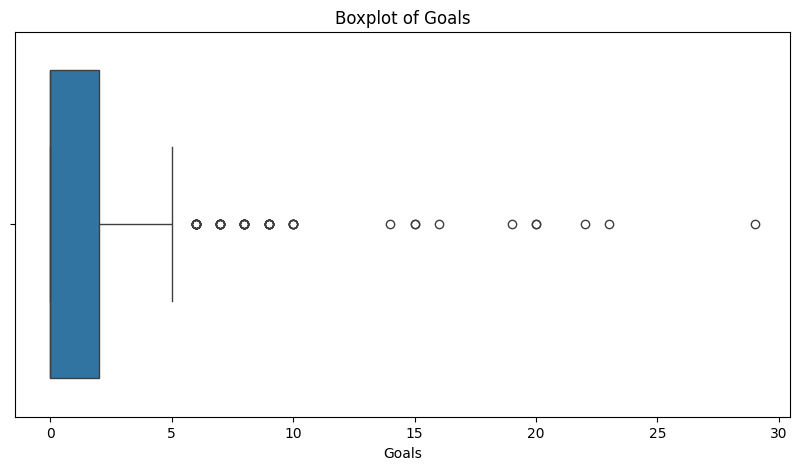

In [35]:
#outliers in Goals
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Goals'])  # Replace 'Goals' with any numerical column
plt.title("Boxplot of Goals")
plt.show()


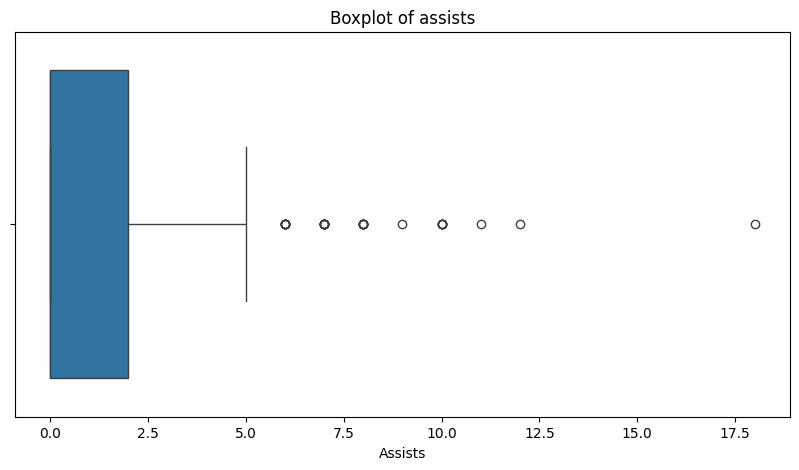

In [36]:
#Ouliers in assists
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Assists'])  # Replace 'Goals' with any numerical column
plt.title("Boxplot of assists")
plt.show()

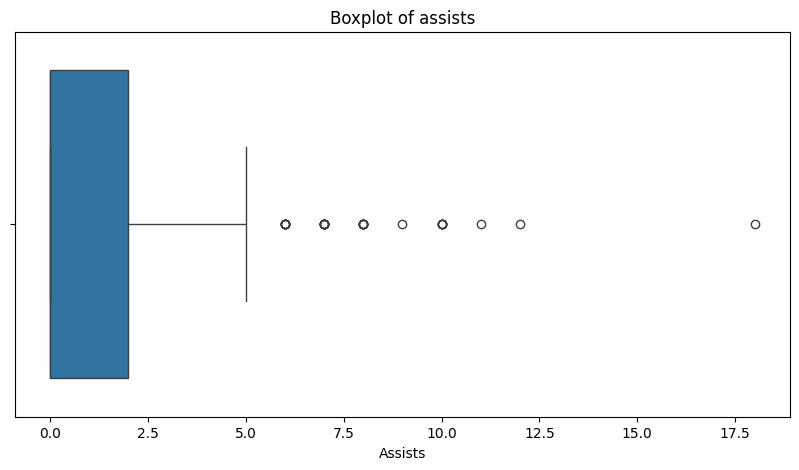

In [37]:
#Ouliers in assists
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Assists'])  # Replace 'Goals' with any numerical column
plt.title("Boxplot of assists")
plt.show()

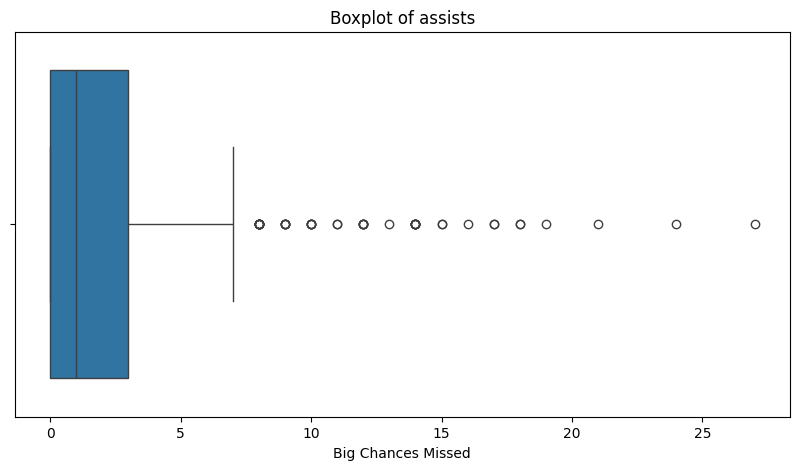

In [38]:
#Ouliers in assists
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Big Chances Missed'])  # Replace 'Goals' with any numerical column
plt.title("Boxplot of assists")
plt.show()

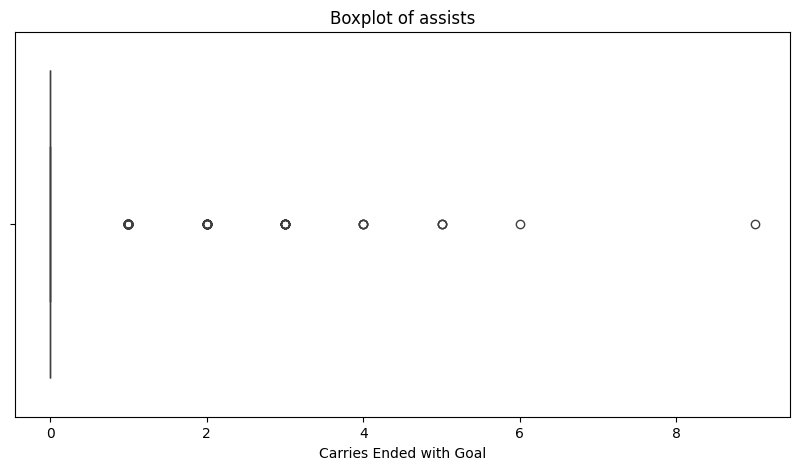

In [39]:
# outliers in Carries Ended with Goal
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Carries Ended with Goal'])  # Replace 'Goals' with any numerical column
plt.title("Boxplot of assists")
plt.show()

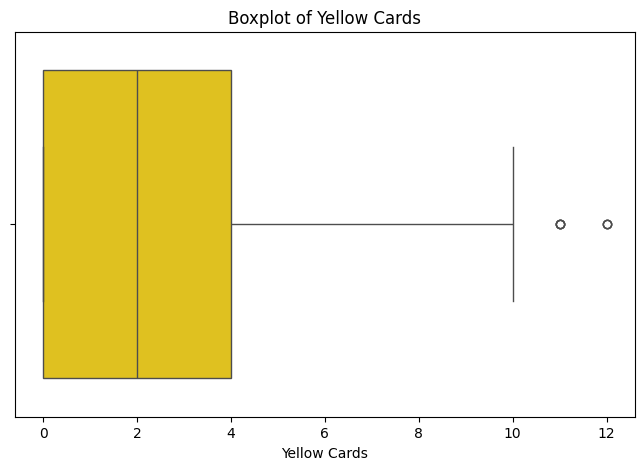

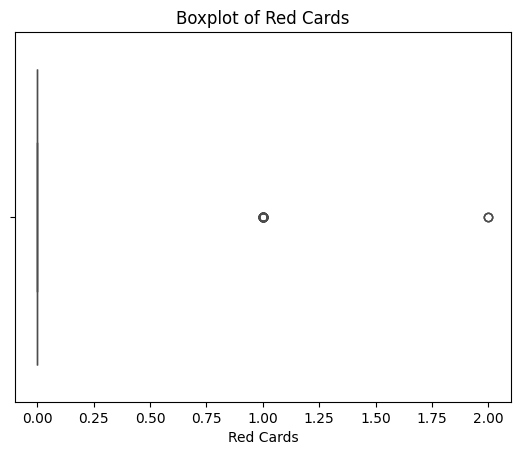

In [40]:
#Outliers in red cards and yellow card
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Yellow Cards'], color='gold')
plt.title('Boxplot of Yellow Cards')
plt.show()

sns.boxplot(x=data['Red Cards'], color='red')
plt.title('Boxplot of Red Cards')
plt.show()


#Encoding

In [41]:

# 👋 Drop columns that aren't useful for modeling
df = data.drop(columns=['Player Name'])


In [43]:
df_encoded = pd.get_dummies(df, columns=['Club', 'Nationality', 'Position'], drop_first=True)


In [44]:
data.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

# Feature and selection

In [45]:
# grouping all required in features into one
features = [
    'Minutes',
    'Shots', 'Shots On Target',
    'Conversion %', 'Assists',
    'Big Chances Missed',
    'Touches',
    'Carries', 'Progressive Carries',
    'Carries Ended with Goal',
    'Carries Ended with Assist',
    'Carries Ended with Shot',
    'Crosses', 'Passes', 'Passes%',
    'Through Balls'
]


In [47]:
y = data['Goals']
x = data[features]

In [50]:
# List of percentage columns to convert
percentage_cols = ['Conversion %', 'Passes%', 'Crosses %', 'fThird Passes %', 'gDuels %', 'aDuels %', 'Saves %']

# Convert percentage columns to numeric
for col in percentage_cols:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace('%', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows where the conversion resulted in NaN
data_cleaned = data.dropna(subset=percentage_cols)


# Calculate correlation matrix with selected features and 'Goals'
# Make sure to use the cleaned data for correlation
corr_matrix = data_cleaned[features + ['Goals']].corr()
corr_with_goals = corr_matrix['Goals'].sort_values(ascending=False)
print(corr_with_goals)

Goals                        1.000000
Shots                        0.778742
Big Chances Missed           0.750743
Assists                      0.495207
Minutes                      0.402709
Passes%                      0.390615
Carries                      0.352031
Progressive Carries          0.336867
Passes                       0.313072
Through Balls                0.312968
Carries Ended with Shot      0.300271
Conversion %                 0.299029
Crosses                      0.274253
Shots On Target              0.265161
Touches                      0.261546
Carries Ended with Assist    0.237843
Carries Ended with Goal      0.172978
Name: Goals, dtype: float64


# Modelling

In [51]:
# 🎯 Define Target Variable
y = df_encoded['Goals']

# 🧠 Define Feature Set (everything except 'Goals')
X = df_encoded.drop(columns=['Goals'])


In [52]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# List of percentage columns to convert
percentage_cols = ['Conversion %', 'Passes%', 'Crosses %', 'fThird Passes %', 'gDuels %', 'aDuels %', 'Saves %']

# Convert percentage columns to numeric in X_train and X_test
for col in percentage_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(str).str.replace('%', '', regex=False)
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(str).str.replace('%', '', regex=False)
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle potential NaNs introduced by coercion (optional, but good practice)
X_train = X_train.dropna(subset=percentage_cols)
y_train = y_train[X_train.index] # Align y_train with X_train after dropping rows
X_test = X_test.dropna(subset=percentage_cols)
y_test = y_test[X_test.index] # Align y_test with X_test after dropping rows


# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression Results:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R^2 Score:", round(r2, 2))

📊 Linear Regression Results:
MAE: 1.54
RMSE: 2.45
R^2 Score: 0.36


# Train through random forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Results:")
print("MAE:", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R^2 Score:", round(r2_rf, 2))


🌲 Random Forest Results:
MAE: 0.98
RMSE: 2.09
R^2 Score: 0.54


##Compare regression moodel and random forest

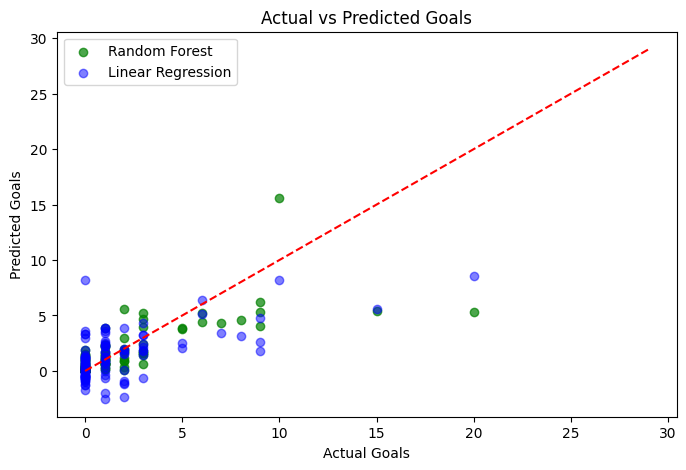

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest', color='green')
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.legend()
plt.title('Actual vs Predicted Goals')
plt.show()
